In [2]:
#Import the liberaries are used in this project
import numpy as np
import scipy
import scipy.signal 
import h5py
import matplotlib.pyplot as plt

In [3]:
data={'ActivPark': h5py.File('L23_f09_as_PARK.mat','r'), 
      'SWAPark': h5py.File('L23_f03_swa_PARK.mat','r'), 
     'ActivCtl': h5py.File('A9_c05_as_CTL.mat','r'), 
     'SWACtl': h5py.File('A9_c01_swa_CTL.mat','r')} 

# Look at the variable names in each data file
for key,value in data.items():
    print(key)
    print(data[key].keys())

ActivPark
<KeysViewHDF5 ['L23_Beat_cycl', 'L23_Beta_EEG', 'L23_EEGipsi', 'L23_Pr18_c08', 'L23_Pr20_c09', 'L23_Pr20_c0A', 'L23_Pr20_c0B', 'L23_Pr23_c0E', 'L23_Pr25_c10', 'L23_Pr25_c11', 'L23_Pr26_c12', 'L23_SS_Pr_1', 'L23_SS_Pr_11', 'L23_SS_Pr_17', 'L23_SS_Pr_21', 'L23_SS_Pr_22', 'L23_SS_Pr_3', 'L23_SS_Pr_7', 'L23_SS_Pr_9']>
SWAPark
<KeysViewHDF5 ['L23_EEGipsi', 'L23_Pr20_c09', 'L23_Pr20_c0A', 'L23_Pr20_c0B', 'L23_Pr23_c0E', 'L23_Pr23_c0F', 'L23_Pr25_c10', 'L23_Pr25_c11', 'L23_SS_Pr_1', 'L23_SS_Pr_11', 'L23_SS_Pr_17', 'L23_SS_Pr_21', 'L23_SS_Pr_22', 'L23_SS_Pr_7']>
ActivCtl
<KeysViewHDF5 ['A9_EEGipsi', 'A9_P2021_c10', 'A9_P2021_c11', 'A9_Pr10_c0C', 'A9_Pr10_c0D', 'A9_Pr10_c0E', 'A9_Pr17_c01', 'A9_Pr17_c10', 'A9_Pr1_c01', 'A9_Pr22_c12', 'A9_Pr22_c13', 'A9_Pr2_c02', 'A9_Pr2_c1B', 'A9_Pr6_c05', 'A9_Pr8_c07', 'A9_Pr8_c08', 'A9_SS_Pr_25', 'A9_SS_Pr_3', 'A9_SS_Pr_4', 'A9_SS_Pr_9']>
SWACtl
<KeysViewHDF5 ['A9_EEGipsi', 'A9_P2021_c10', 'A9_P2021_c11', 'A9_Pr10_c0C', 'A9_Pr10_c0D', 'A9_Pr10_c0E',

In [4]:
# Look up variables in a specific dataset
dict(data['ActivPark']['L23_Pr20_c09'])

{'comment': <HDF5 dataset "comment": shape (33, 1), type "<u2">,
 'length': <HDF5 dataset "length": shape (1, 1), type "<f8">,
 'resolution': <HDF5 dataset "resolution": shape (1, 1), type "<f8">,
 'times': <HDF5 dataset "times": shape (1, 725), type "<f8">,
 'title': <HDF5 dataset "title": shape (8, 1), type "<u2">}

In [5]:
# Select a few datasets to work with: EEG and 3 spike trains (STs) from Parkinsonian animals in the 'activated state'
EEG=data['ActivPark']['L23_EEGipsi']
ST1=data['ActivPark']['L23_Pr20_c09']
ST2=data['ActivPark']['L23_Pr20_c0A']
ST3=data['ActivPark']['L23_Pr20_c0B']
dict(EEG)

{'comment': <HDF5 dataset "comment": shape (10, 1), type "<u2">,
 'interval': <HDF5 dataset "interval": shape (1, 1), type "<f8">,
 'length': <HDF5 dataset "length": shape (1, 1), type "<f8">,
 'offset': <HDF5 dataset "offset": shape (1, 1), type "<f8">,
 'scale': <HDF5 dataset "scale": shape (1, 1), type "<f8">,
 'start': <HDF5 dataset "start": shape (1, 1), type "<f8">,
 'title': <HDF5 dataset "title": shape (7, 1), type "<u2">,
 'units': <HDF5 dataset "units": shape (2, 1), type "<u2">,
 'values': <HDF5 dataset "values": shape (1, 35715), type "<f8">}

In [6]:
# Find the number of sampling points in EEG trace (EEG[values])
EEG_values=EEG['values'][0]
EEG_length=len(EEG_values)
print('EEG length: ', EEG_length)

#Find the EEG time interval
EEG_interval=EEG['interval'][0]
print('EEG interval: ', EEG_interval)

EEG length:  35715
EEG interval:  [0.0028]


In [7]:
# Find the duration of the recording as the number of points time sampling interval (EEG[interval])
duration = EEG_length * EEG_interval
print('Duration of the recording: ', duration)

# Find the freguency in active state
frequency = 1 / EEG_interval
print('Freguency in the active state: ', frequency)

Duration of the recording:  [100.002]
Freguency in the active state:  [357.14285714]


(0.0, 1000.0)

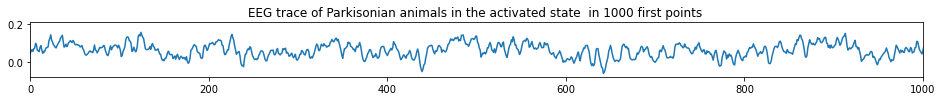

In [8]:
# Look up the 1000 first points in EEG trace

# Use linspace from numpy (np.linspace) to generate the time vector T
T=np.linspace(0, duration, num=EEG_length)

plt.figure(figsize=(16,1))
plt.plot(EEG_values)
plt.title('EEG trace of Parkisonian animals in the activated state  in 1000 first points ')
plt.xlim(0,1000)

Text(0.5, 1.0, 'EEG trace of control animals in the slow wave state')

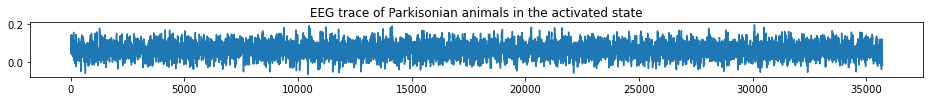

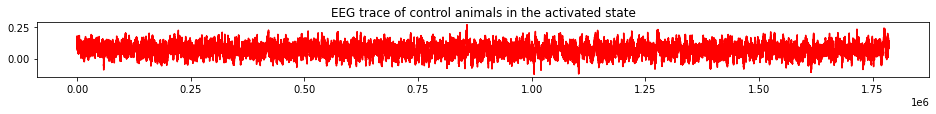

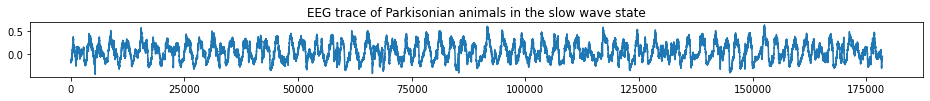

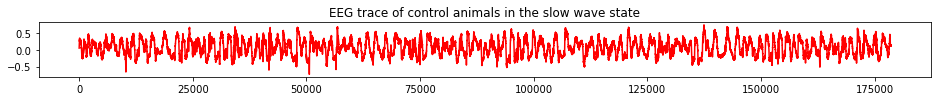

In [9]:
# Look up in EEG trace in all the conditions

#First, in active state from parkinsonian animals
EEG=data['ActivPark']['L23_EEGipsi']
EEG_values=EEG['values'][0]
EEG_interval=EEG['interval'][0]

duration = len(EEG_values) * EEG_interval
T=np.linspace(0, duration, num=len(EEG_values))
plt.figure(figsize=(16,1))
plt.plot(EEG_values)
plt.title('EEG trace of Parkisonian animals in the activated state')

#Second, in active state from control animals
EEG_ctl=data['ActivCtl']['A9_EEGipsi']
EEG_values_ctl=EEG_ctl['values'][0]
EEG_interval_ctl=EEG_ctl['interval'][0] 
duration2 = len(EEG_values_ctl) * EEG_interval_ctl
T=np.linspace(0, duration2, num=len(EEG_values_ctl))
plt.figure(figsize=(16,1))
plt.plot(EEG_values_ctl,'r')
plt.title('EEG trace of control animals in the activated state')

#Third, in the slow wave state from parkinsonian animals
EEG_SWA=data['SWAPark']['L23_EEGipsi']
EEG_values_SWA=EEG_SWA['values'][0]                     
EEG_interval_SWA=EEG_SWA['interval'][0] 

duration3 = len(EEG_values_SWA) * EEG_interval_SWA
T=np.linspace(0, duration3, num=len(EEG_values_SWA))
plt.figure(figsize=(16,1))
plt.plot(EEG_values_SWA)
plt.title('EEG trace of Parkisonian animals in the slow wave state')

#Lastly, in the slow wave state from control animals
EEG_SWA_ctl=data['SWACtl']['A9_EEGipsi']
EEG_values_SWA_ctl=EEG_SWA_ctl['values'][0]                     
EEG_interval_SWA_ctl=EEG_SWA_ctl['interval'][0]
duration4 = len(EEG_values_SWA_ctl) * EEG_interval_SWA_ctl
T=np.linspace(0, duration4, num=len(EEG_values_SWA_ctl))
plt.figure(figsize=(16,1))
plt.plot(EEG_values_SWA_ctl,'r')
plt.title('EEG trace of control animals in the slow wave state')

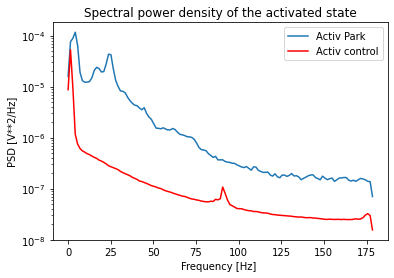

In [10]:
# A Power Spectral Density (PSD) is the measure of signal's power content versus frequency. 
# A PSD is typically used to characterize broadband random signals. 
#The amplitude of the PSD is normalized by the spectral resolution employed to digitize the signal.


# Compute the spectral power density histogram (spectrum) of the EEG trace using scipy.signal.welch
# Spectral power density histogram is estimatation of power spectral density (PSD) using Welch’s method  
# Welch’s method is using of the fast Fourier transform for the estimation of power spectra.


# Estimate PSD in active state in the parkinsonian and control animals. 
#Parkinsonian activated state
EEG=data['ActivPark']['L23_EEGipsi']
EEG_values=EEG['values'][0]
EEG_interval=EEG['interval'][0]
frequency = 1 / EEG_interval

f, psd = scipy.signal.welch(EEG_values, fs=357, nperseg= 256)
plt.semilogy(f, psd,label='Activ Park')

plt.title('Spectral power density of the activated state')
plt.xlabel('Frequency [Hz] ')
plt.ylabel('PSD [V**2/Hz]')


#Control activated state
EEG_ctl=data['ActivCtl']['A9_EEGipsi']
EEG_values_ctl=EEG_ctl['values'][0]

EEG_interval_ctl=EEG_ctl['interval'][0]                      
frequency_ctl = 1 / EEG_interval_ctl

f, psd = scipy.signal.welch(EEG_values_ctl, fs=357, nperseg= 256)
plt.semilogy(f, psd,'r',label='Activ control')

plt.xlabel('Frequency [Hz] ')
plt.ylabel('PSD [V**2/Hz]')
plt.legend()
plt.show()

Frequency of SWA:  [1785.71428571]


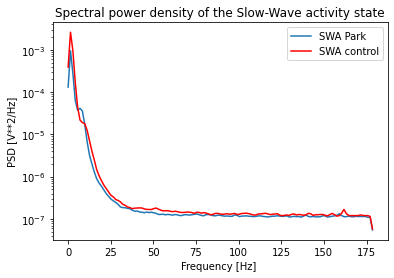

In [11]:
# Estimate PSD in slow wave activity state in the parkinsonian and control animals.

#Parkinson Slow wave activity state
EEG_SWA=data['SWAPark']['L23_EEGipsi']
EEG_values_SWA=EEG_SWA['values'][0]
                      
EEG_interval_SWA=EEG_SWA['interval'][0]                      
frequency_SWA = 1 / EEG_interval_SWA
print('Frequency of SWA: ', frequency_SWA)                      
                      
f, psd = scipy.signal.welch(EEG_values_SWA, fs=357, nperseg= 256)
plt.semilogy(f, psd,label='SWA Park')
plt.title('Spectral power density of the Slow-Wave activity state')
plt.xlabel('Frequency [Hz] ')
plt.ylabel('PSD [V**2/Hz]')


#Control Slow wave activity state
EEG_SWA_ctl=data['SWACtl']['A9_EEGipsi']
EEG_values_SWA_ctl=EEG_SWA_ctl['values'][0]
                      
EEG_interval_SWA_ctl=EEG_SWA_ctl['interval'][0]                      
frequency_SWA_ctl = 1 / EEG_interval_SWA_ctl
                      
f, psd = scipy.signal.welch(EEG_values_SWA_ctl, fs=357, nperseg= 256)
plt.semilogy(f, psd,'r',label='SWA control')
plt.xlabel('Frequency [Hz] ')
plt.ylabel('PSD [V**2/Hz]')


plt.legend()
plt.show()

In [12]:
# Look up spike times for the two spike trains

# Spike train : is a sequence of recorded times at which a neuron fires an action potential

ST1_times = ST1['times'][0]
print(ST1_times)
ST2_times = ST2['times'][0]
print(ST2_times)
ST3_times = ST3['times'][0]
print(ST3_times)

[1.57264000e-02 9.08224000e-02 1.01014400e-01 2.71926400e-01
 3.12022400e-01 3.54918400e-01 5.19670400e-01 5.58646400e-01
 6.48414400e-01 7.72006400e-01 8.05942400e-01 8.56958400e-01
 9.47846400e-01 1.00379040e+00 1.12049440e+00 1.12340640e+00
 1.32315840e+00 1.40105440e+00 1.48891840e+00 1.52061440e+00
 1.56681440e+00 1.71515840e+00 1.72064640e+00 1.78885440e+00
 1.81657440e+00 1.87005440e+00 1.98799040e+00 2.03743840e+00
 2.27062240e+00 2.33048640e+00 2.38738240e+00 2.41577440e+00
 2.47087840e+00 2.63988640e+00 2.69493440e+00 2.72651840e+00
 2.78677440e+00 2.84490240e+00 2.96978240e+00 3.10720640e+00
 3.20851040e+00 3.22239840e+00 3.29967840e+00 3.52715040e+00
 3.65320640e+00 3.71043840e+00 3.78581440e+00 3.84847840e+00
 3.88510240e+00 3.96109440e+00 3.99245440e+00 4.05159040e+00
 4.10831840e+00 4.14611840e+00 4.22160640e+00 4.31339040e+00
 4.38876640e+00 4.61612640e+00 4.67475840e+00 4.73288640e+00
 4.79151840e+00 4.87400640e+00 5.09067040e+00 5.17539840e+00
 5.18615040e+00 5.226470

In [13]:
# Make an instantaneous firing rate (IFR) in bins of 1 ms using the function np.histogram

# IFR (instaneous firing rate): number of spikes per ms


hist1, X = np.histogram(ST1_times, range = [0,100], bins =100000)
print('IFR ST1: ', hist1)
print('Sum of IFR ST1: ', np.sum(hist1))

hist2, X = np.histogram(ST2_times, range = [0,100], bins =100000)
print('IFR ST2: ', hist2)
print('Sum of IFR ST2: ', np.sum(hist2))

hist3, X = np.histogram(ST3_times, range = [0,100], bins =100000)
print('IFR ST3: ', hist3)
print('Sum of IFR ST3: ', np.sum(hist3))

IFR ST1:  [0 0 0 ... 0 0 0]
Sum of IFR ST1:  725
IFR ST2:  [0 0 0 ... 0 0 0]
Sum of IFR ST2:  1495
IFR ST3:  [0 0 0 ... 0 0 0]
Sum of IFR ST3:  2876


(-0.25, 0.25)

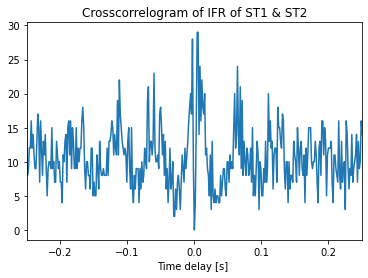

In [14]:
# Plot the crosscorrelogram of IFR of spike train 1 and IFR of spike train 2 for delays from -250ms to +250ms

# Cross-correlation is the correlation between two signals on different delays (lags)
C=scipy.signal.correlate(hist1, hist2, mode='full', method='auto')
T = 0.5*np.linspace(-len(hist1)/frequency, +len(hist1)/frequency , len(C))

#plt.figure(figsize=(16,3))
plt.title('Crosscorrelogram of IFR of ST1 & ST2')
plt.xlabel('Time delay [s] ')
plt.plot(T, C);
plt.xlim(-0.25,+0.25)

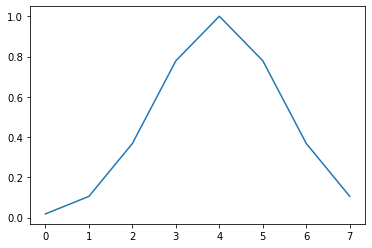

In [15]:
# Smooth the signal by averaging each value with neighboring values, using a Gaussian window
# visualize our smoothing gaussian window, before applynig on our signals.

# Duration of the time window over which to smooth the signal
dt = 0.025
trange = int(dt*frequency)

# Standard deviation of the gaussian
sigma = trange/4

# Actual temporal window over which to compute the Gaussian
window = np.arange(-trange//2,trange//2)

# Gaussian function over window and standard deviation sigma
gaussian = np.exp(-(window/sigma)**2)
plt.plot(gaussian);

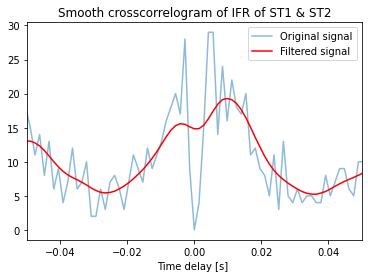

In [16]:
# Smooth the crosscorrelogram of IFR of spike train 1 and IFR of spike train 2 
# and plot for delays from -50ms to +50ms.

#Use gaussian window 
dt = 0.05
trange = int(dt*frequency)
sigma = trange/4
window = np.arange(-trange//2,trange//2)
gaussian = np.exp(-(window/sigma)**2)

# Smooth the signal using the numpy convolution function
E = np.convolve(np.abs(C), gaussian, mode='same') / gaussian.sum()

#plt.figure(figsize=(16,3))
plt.title('Smooth crosscorrelogram of IFR of ST1 & ST2')
plt.xlabel('Time delay [s] ')
plt.plot(T, C, alpha=0.5, label = 'Original signal') # original signal
plt.plot(T, E,'r-', label='Filtered signal');
plt.xlim(-0.05,0.05);
plt.legend()

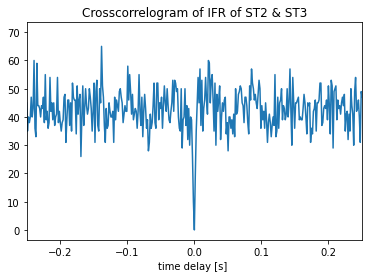

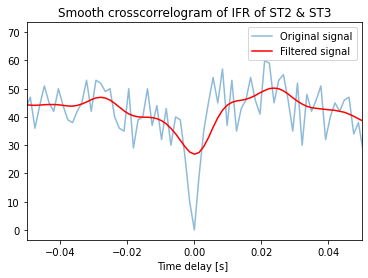

In [17]:
# Repeat the same procedure for spike trains 2 and 3
# Plot the crosscorrelogram of  IFR of spike train 2 and IFR of spike train 3 for delays from -250ms to +250ms

C=scipy.signal.correlate(hist2, hist3, mode='full', method='auto')
T = 0.5*np.linspace(-len(hist2)/frequency, +len(hist2)/frequency , len(C))

#plt.figure(figsize=(16,3))
plt.title('Crosscorrelogram of IFR of ST2 & ST3')
plt.xlabel('time delay [s] ')
plt.plot(T, C);
plt.xlim(-0.25,+0.25)

#apply the gaussian filter for spike trains 2 and 3
dt = 0.05
trange = int(dt*frequency)
sigma = trange/4
window = np.arange(-trange//2,trange//2)
gaussian = np.exp(-(window/sigma)**2)

E = np.convolve(np.abs(C), gaussian, mode='same') / gaussian.sum()

plt.figure(figsize=(6,4))
plt.title('Smooth crosscorrelogram of IFR of ST2 & ST3')
plt.xlabel('Time delay [s] ')
plt.plot(T, C, alpha=0.5, label = 'Original signal')
plt.plot(T, E,'r-', label='Filtered signal');
plt.xlim(-0.05,0.05);
plt.legend()

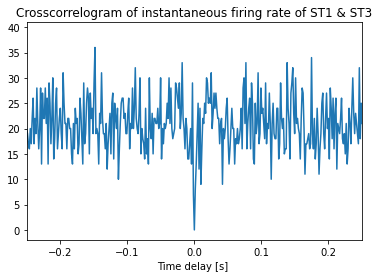

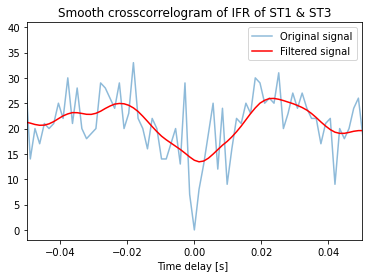

In [18]:
#Plot the crosscorrelogram of  IFR of spike train 1 and IFR of spike train 3 for delays from -250ms to +250ms

frequency = 1 / EEG_interval
C=scipy.signal.correlate(hist1, hist3, mode='full', method='auto')
T = 0.5*np.linspace(-len(hist3)/frequency, +len(hist3)/frequency , len(C))

#plt.figure(figsize=(16,3))
plt.title('Crosscorrelogram of instantaneous firing rate of ST1 & ST3')
plt.xlabel('Time delay [s] ')
plt.plot(T, C);
plt.xlim(-0.25,+0.25)

#apply the gaussian filter for spike trains 1 and 3
dt = 0.05
trange = int(dt*frequency)
sigma = trange/4
window = np.arange(-trange//2,trange//2)
gaussian = np.exp(-(window/sigma)**2)

E = np.convolve(np.abs(C), gaussian, mode='same') / gaussian.sum()

plt.figure(figsize=(6,4))
plt.title('Smooth crosscorrelogram of IFR of ST1 & ST3')
plt.xlabel('Time delay [s] ')
plt.plot(T, C, alpha=0.5,label = 'Original signal')
plt.plot(T, E,'r-', label='Filtered signal');
plt.xlim(-0.05,0.05);
plt.legend()

['L23_Beat_cycl', 'L23_Beta_EEG', 'L23_EEGipsi', 'L23_Pr18_c08', 'L23_Pr20_c09', 'L23_Pr20_c0A', 'L23_Pr20_c0B', 'L23_Pr23_c0E', 'L23_Pr25_c10', 'L23_Pr25_c11', 'L23_Pr26_c12', 'L23_SS_Pr_1', 'L23_SS_Pr_11', 'L23_SS_Pr_17', 'L23_SS_Pr_21', 'L23_SS_Pr_22', 'L23_SS_Pr_3', 'L23_SS_Pr_7', 'L23_SS_Pr_9'] 19


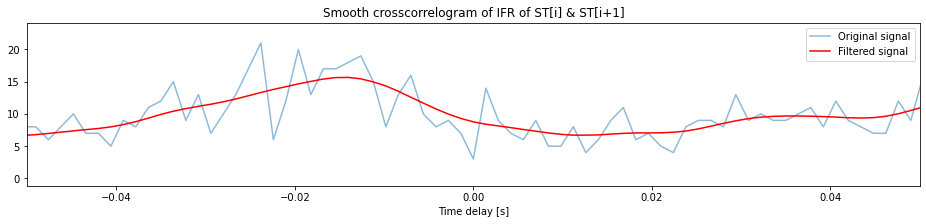

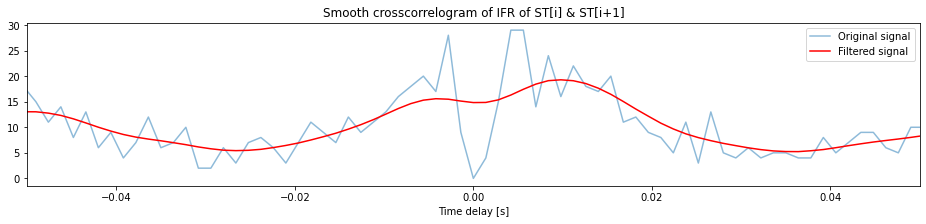

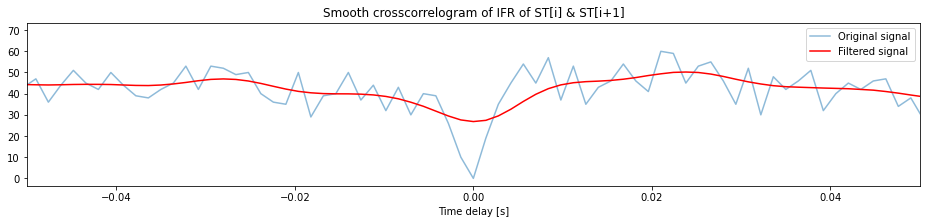

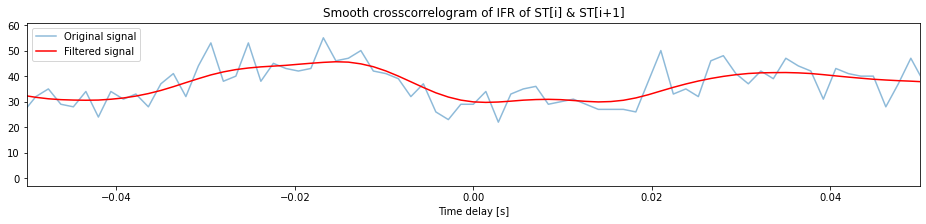

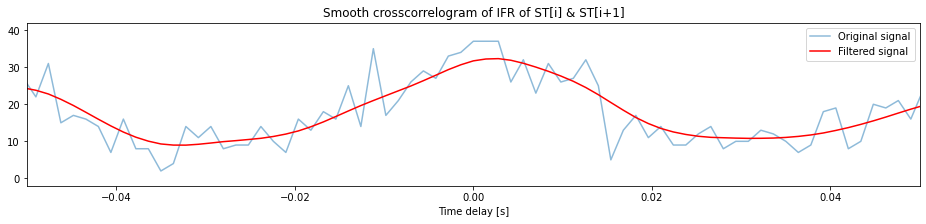

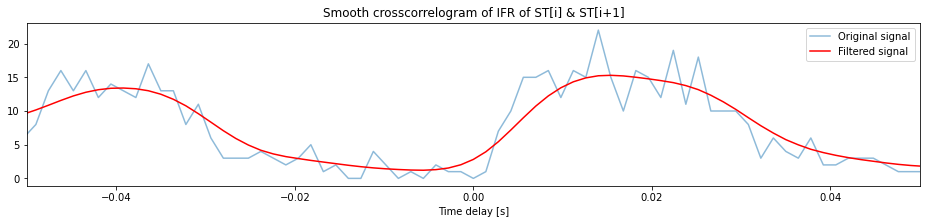

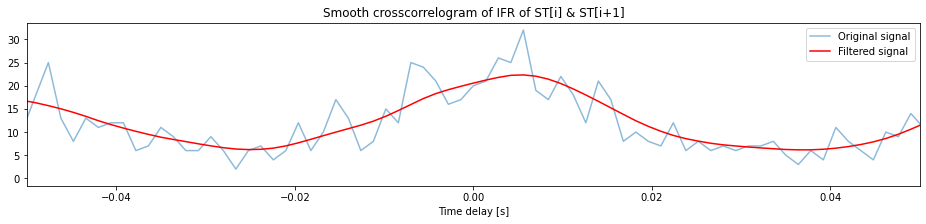

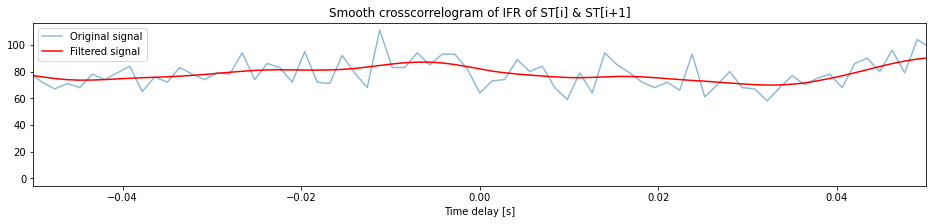

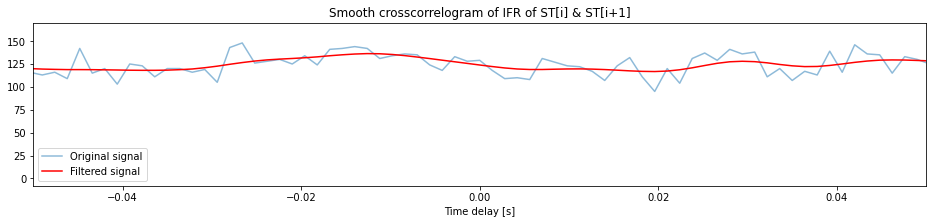

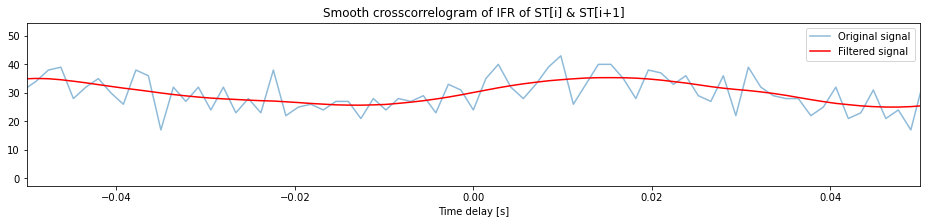

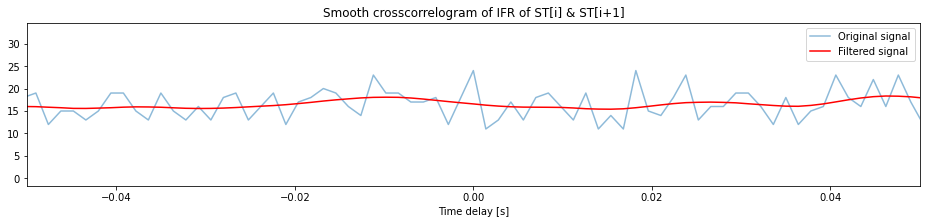

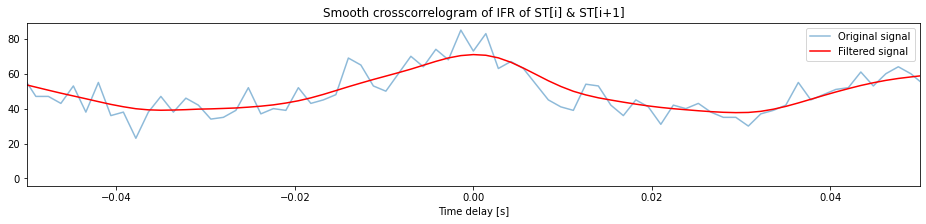

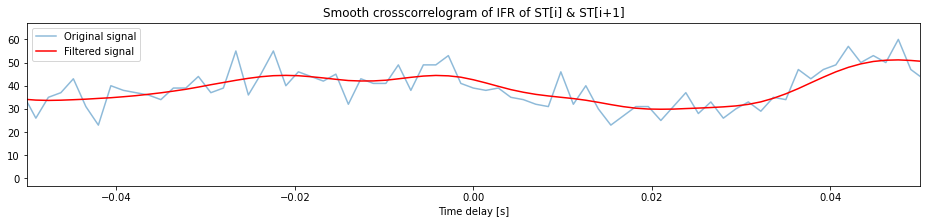

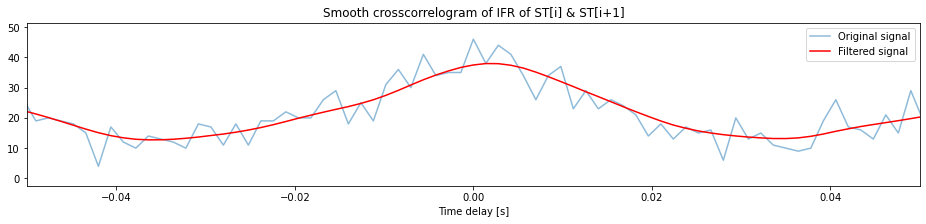

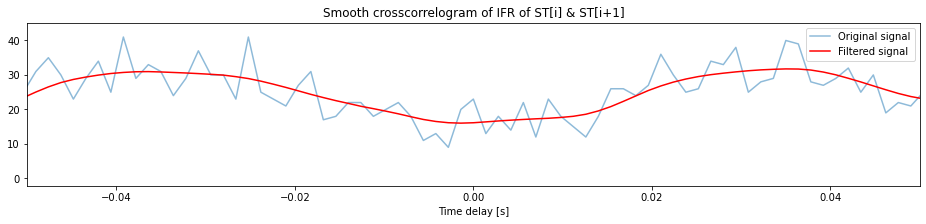

In [19]:
# ploting the crosscorrelogram and guassian filter for all pairs of spike trains recorded in the active state file.
# the first 3 signals correspond to EEG or filtered EEG and not be considered. 

# Crosscorrelation between all spikes trains in Parkinsonian animals in active state
keys=list(data['ActivPark'].keys())
print(keys, len(keys))
frequency = 1 / EEG_interval
for i in range(3,18,1):
    ST1=data['ActivPark'][keys[i]]
    ST2=data['ActivPark'][keys[i+1]]
    ST1_times = ST1['times'][0]
    ST2_times = ST2['times'][0]
    hist1, bin1 =np.histogram(ST1_times, range = [0,100], bins =100000)
    hist2, bin2 =np.histogram(ST2_times, range = [0,100], bins =100000)
    C= scipy.signal.correlate(hist1, hist2, mode='full', method='auto')
    T = 0.5*np.linspace(-len(hist1)/frequency, +len(hist1)/frequency , len(C))
    
    dt = 0.050
    trange = int(dt*frequency)
    sigma = trange/4 # Standard deviation of the gaussian
    window = np.arange(-trange//2,trange//2) # Actual temporal window over which to compute the Gaussian
    gaussian = np.exp(-(window/sigma)**2)# Gaussian function over window and standard deviation sigma
    
    E = np.convolve(np.abs(C), gaussian, mode='same') / gaussian.sum()
   
    plt.figure(figsize=(16,3))
    plt.title('Smooth crosscorrelogram of IFR of ST[i] & ST[i+1]')
    plt.xlabel('Time delay [s]')
    plt.plot(T, C, alpha=0.5,label = 'Original signal') # original signal
    plt.plot(T, E,'r-', label='Filtered signal');
    plt.xlim(-0.05,0.05);
    plt.legend()

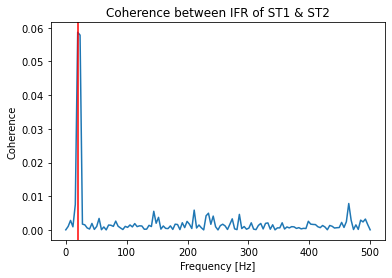

In [20]:
# Look at the coherence between instantaneous firing rate (IFR) of ST1 and ST2 with function scipy.signal.coherence

# Coherence : Scipy's coherence function estimates the coherence from the PSD of two signals
# Coherence measures how much power can be transferred from input to output in linear systems. 

frequency, coherence = scipy.signal.coherence(hist1, hist2, fs=1000, nperseg= 256)
plt.title('Coherence between IFR of ST1 & ST2')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Coherence')
plt.plot(frequency, coherence)

# Plot a vertical line at maximal coherence and get the corresponding frequency using the function plt.axvline
line= np.where(np.abs(coherence-max(coherence))<=0)
plt.axvline(x=frequency[line], ymin=0, ymax=1, color='red')

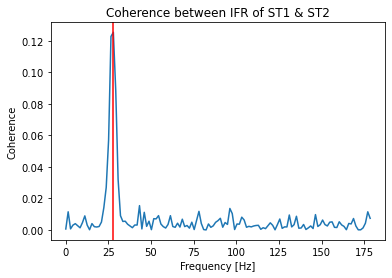

In [21]:
#Compute the coherence between the EEG and the firing rates of single spike trains. 

# First step: Recompute the IFR for a time bin similar to EEG sampling interval
ST1_times = ST1['times'][0]
ST2_times = ST2['times'][0]
new_hist1, bin1 =np.histogram(ST1_times, range = [0,100], bins =28000)
new_hist2, bin2 =np.histogram(ST2_times, range = [0,100], bins =28000)

# Second step: Look at the coherence between IFR of spike train 1 and IFR of spike train 2 with new time bin
frequency, coherence = scipy.signal.coherence(new_hist1, new_hist2, fs=357, nperseg= 256)
plt.title('Coherence between IFR of ST1 & ST2')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Coherence')
plt.plot(frequency, coherence)

# Plot a vertical line at maximal coherence and get the corresponding frequency
line= np.where(np.abs(coherence-max(coherence))<=0)
plt.axvline(x=frequency[line], ymin=0, ymax=1, color='red')

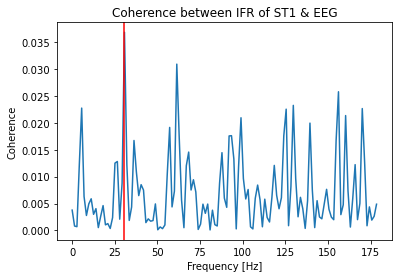

In [22]:
#Compute the coherence between IFR of a spike train and the EEG

EEG=data['ActivPark']['L23_EEGipsi']
ST1=data['ActivPark']['L23_Pr20_c09']
EEG_values=EEG['values'][0]
ST1_times = ST1['times'][0]
new_hist1, bin1 =np.histogram(ST1_times, range = [0,100], bins =28000)
new_hist2, bin2 =np.histogram(EEG_values, range = [0,100], bins =28000)

frequency, coherence = scipy.signal.coherence(new_hist1, new_hist2, fs=357, nperseg= 256)
plt.title('Coherence between IFR of ST1 & EEG')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Coherence')
plt.plot(frequency, coherence)

# Plot a vertical line at maximal coherence and get the corresponding frequency
line= np.where(np.abs(coherence-max(coherence))<=0)
plt.axvline(x=frequency[line], ymin=0, ymax=1, color='red')

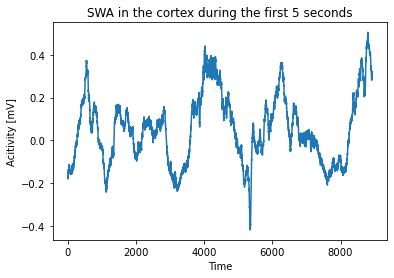

In [35]:
#look up a file with SWA activity in the cortex, and plot the 5 first seconds of this EEG
EEG_data=data['SWAPark']['L23_EEGipsi']
EEG_values_2=EEG_data['values'][0]
EEG_interval_2=EEG['interval'][0]
plt.title('SWA in the cortex during the first 5 seconds')
plt.xlabel('Time')
plt.ylabel('Acitivity [mV]')
plt.plot(EEG_values[:int(5/EEG_interval_2)]);

In [36]:
# Build a band pass filter with [0.5 1.5] Hz band for EEG using scipy.signal.butter
def butter_bandpass(lowcut, highcut, fs, order):
    return scipy.signal.butter(order, [lowcut/(0.5*fs), highcut/(0.5*fs)], btype='band',output='sos')

EEG Value of SWA : [-0.17181396 -0.17318726 -0.17456055 ... -0.04707336 -0.04798889
 -0.03913879]
EEG Value of the filtered SWA : [-2.88499757e-15 -3.17250361e-14 -1.75865397e-13 ...  1.79736642e-01
  1.79873743e-01  1.80008370e-01]


Text(0, 0.5, 'Acitivity [mV]')

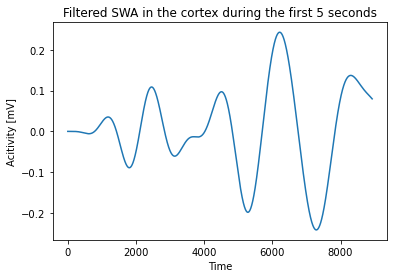

In [37]:
# Filter EEG with scipy.signal.filtfilt using the filter built in cell 18, and plot first 5 s of filtered EEG
def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    sos = butter_bandpass(lowcut, highcut, fs, order)
    filtered_EEG = scipy.signal.sosfilt(sos, EEG_values_2) 
    return filtered_EEG

filtered_EEG = butter_bandpass_filter(EEG_values_2,0.5,1.5,1785,5)
print ('EEG Value of SWA :', EEG_values_2)
print('EEG Value of the filtered SWA :', filtered_EEG)

#plot first 5 s of filtered EEG
plt.plot(filtered_EEG[:int(5/EEG_interval_2)])
plt.title('Filtered SWA in the cortex during the first 5 seconds')
plt.xlabel('Time')
plt.ylabel('Acitivity [mV]')

Lentgh of ST1 time:  3294
STA1 time1:  1.9998095999999999
STA1 time2:  98.0174096
Value of the STA at 0 time lag:  -0.024225651780057977


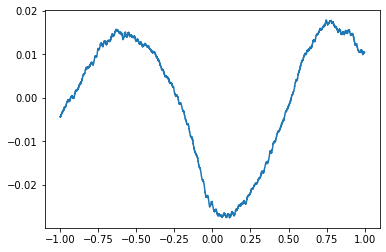

In [26]:
# Load one spike train and the EEG values and sampling interval from the SWAPark file
ST1=data['SWAPark']['L23_Pr20_c09'] 
ST1_times=ST1['times'][0]
print('Lentgh of ST1 time: ', len(ST1_times))
EEG=data['SWAPark']['L23_EEGipsi']
EEG_data=EEG['values'][0]
EEG_interval=EEG['interval'][0]


# Compute the spike-triggered average (STA) of the EEG trace with the first spike train

# STA (spike-triggered average) : is a measure to relate a continuous signal (EEG) and a simultaneously recorded spike train
#                                 It represents the average signal taken at the times of spike occurrences
#                                 is equivalent to the cross-correlation between the continuous signal and the spike train.

windowsec=2; windowint=windowsec/EEG_interval; 
t=np.arange(-windowsec/2,windowsec/2-EEG_interval,EEG_interval)
STA=np.zeros(int(windowint))
i1=np.argmin(np.abs(ST1_times-windowsec))
i2=np.argmin(np.abs(ST1_times-(len(EEG_data)*EEG_interval-windowsec)))
print('STA1 time1: ', ST1_times[i1])
print('STA1 time2: ', ST1_times[i2])
for i in range(i1,i2):
    STA += EEG_data[int(ST1_times[i+1]/EEG_interval)-int(windowint/2)-1:int(ST1_times[i+1]/EEG_interval)+int(windowint/2)]

STA=STA/(len(ST1_times)-2)
STA=STA-np.mean(STA)
plt.plot(t,STA);

# Value of the spike-triggered average at 0 time lag
print('Value of the STA at 0 time lag: ', STA[int(windowint/2)])

['L23_EEGipsi', 'L23_Pr20_c09', 'L23_Pr20_c0A', 'L23_Pr20_c0B', 'L23_Pr23_c0E', 'L23_Pr23_c0F', 'L23_Pr25_c10', 'L23_Pr25_c11', 'L23_SS_Pr_1', 'L23_SS_Pr_11', 'L23_SS_Pr_17', 'L23_SS_Pr_21', 'L23_SS_Pr_22', 'L23_SS_Pr_7'] 14
Value of STA at 0 time lag:  [-0.024225651780057977, -0.07324562915552801, 0.10212848066337073, -0.056443753725938024, -0.08166482712028889, -0.06753157917015612, 0.16198437342754568, 0.15617695252435826, -0.007583152533646213, -0.09443011284319613, -0.05386067485353443, -0.056365244262851145, -0.056936422244619825]


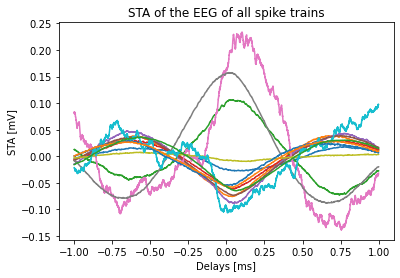

In [27]:
# Compute and plot the STA of the EEG with respect to all spike trains recorded in this SWAPark file
# Save the value of the STA at 0 time lag for all considered spike trains

keys=list(data['SWAPark'].keys())
print(keys, len(keys))

EEG=data['SWAPark']['L23_EEGipsi']
EEG_interval=EEG['interval'][0]
#print(EEG_interval)
frequency = 1 / EEG_interval

oui = []
for i in range(1,14,1):
    ST1=data['SWAPark'][keys[i]]
    ST1_times = ST1['times'][0]
 
    windowsec=2; windowint=windowsec/EEG_interval; 
    t=np.arange(-windowsec/2,windowsec/2-EEG_interval,EEG_interval)
    STA=np.zeros(int(windowint))
    i1=np.argmin(np.abs(ST1_times-windowsec))
    i2=np.argmin(np.abs(ST1_times-(len(EEG_data)*EEG_interval-windowsec)))
    #print(ST1_times[i1])
    #print(ST1_times[i2])
    for i in range(i1,i2):
        STA += EEG_data[int(ST1_times[i+1]/EEG_interval)-int(windowint/2)-1:int(ST1_times[i+1]/EEG_interval)+int(windowint/2)]

    STA=STA/(len(ST1_times)-2)
    STA=STA-np.mean(STA)
    
#plt.figure(figsize=(16,3))
    plt.xlabel('Delays [ms]')
    plt.ylabel('STA [mV]')
    plt.title('STA of the EEG of all spike trains')
    plt.plot(t,STA)

# Value of the spike-triggered average at 0 time lag
    STA_0 = STA[int(windowint/2)]
   # print(STA_0)
    oui.append(STA_0)
                    
print('Value of STA at 0 time lag: ', oui)

In [28]:
# For each spike train in the data set, compute the mean firing rate 
# Mean firing rate : is the average number of spikes observed per unit of time (ms in our case)

# Mean firing rate of SWA parkinsonian
keys=list(data['SWAPark'].keys())
EEG=data['SWAPark']['L23_EEGipsi']
EEG_values=EEG['values'][0]
EEG_interval=EEG['interval'][0]
EEG_lentgh2=len(EEG_values)
#print(EEG_lentgh2)
duration2 = EEG_lentgh2 * EEG_interval
#print(duration2)

IFR_SWA_park = []
for i in range(1,14,1):
    ST1=data['SWAPark'][keys[i]]
    ST1_times = ST1['times'][0]
    hist1, X = np.histogram(ST1_times, range = [0,20], bins =20000)
    #print(hist1)
    #print(np.sum(hist1))
    mean_firing_rate = np.sum(hist1)/len(hist1)
    #print(mean_firing_rate)
    IFR_SWA_park.append(mean_firing_rate)

print('List of IFR Parkinsonian animal in SWA state: ', IFR_SWA_park)
    
list(np.float_(IFR_SWA_park))    
mean_IFR_SWA_park = np.mean(IFR_SWA_park)
print('Mean of IFR Parkinsonian animal in SWA: ', mean_IFR_SWA_park)



List of IFR Parkinsonian animal in SWA state:  [0.0335, 0.02005, 0.0099, 0.0271, 0.00975, 0.03715, 0.0001, 0.01655, 0.0399, 0.00045, 0.01645, 0.0323, 0.0409]
Mean of IFR Parkinsonian animal in SWA:  0.02185384615384615


Text(0.5, 1.0, 'mean firing rate of the spike trains vs the value of the spike-triggered average at 0 time lag')

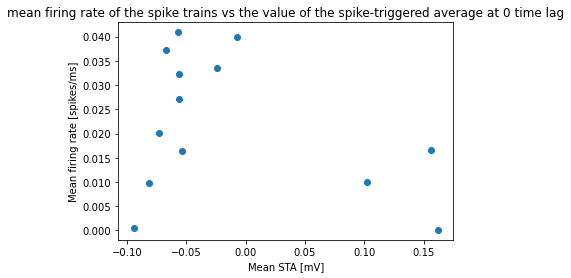

In [29]:
# Plot the mean firing rate of the spike trains vs the value of the spike-triggered average at 0 time lag

abs_oui = np.abs(oui)
plt.scatter(oui,IFR_SWA_park)
plt.xlabel('Mean STA [mV]')
plt.ylabel('Mean firing rate [spikes/ms]')
plt.title('mean firing rate of the spike trains vs the value of the spike-triggered average at 0 time lag')

In [30]:
# Extra plotting

# Mean Firing rate of SWA control
keys=list(data['SWACtl'].keys())

EEG_SWA_ctl=data['SWACtl']['A9_EEGipsi']
EEG_values_SWA_ctl=EEG_SWA_ctl['values'][0]
EEG_interval_SWA_ctl=EEG_SWA_ctl['interval'][0]

IFR_SWA_Ctl = []
for i in range(1,20,1):
    ST1=data['SWACtl'][keys[i]]
    ST1_times = ST1['times'][0]
    hist1, X = np.histogram(ST1_times, range = [0,20], bins =20000)
    mean_firing_rate = np.sum(hist1)/len(hist1)
    IFR_SWA_Ctl.append(mean_firing_rate)

print('List of IFR of conrol animal in SWA state: ', IFR_SWA_Ctl)
    
list(np.float_(IFR_SWA_Ctl))    
mean_IFR_SWA_Ctl = np.mean(IFR_SWA_Ctl)
print('List of IFR of conrol animal in SWA state:', mean_IFR_SWA_Ctl)

List of IFR of conrol animal in SWA state:  [0.02725, 0.02175, 0.0654, 0.01165, 0.0151, 0.0191, 0.0326, 0.02495, 0.04395, 0.02315, 0.02925, 0.0293, 0.02925, 0.03145, 0.01265, 0.05245, 0.03835, 0.0055, 0.03525]
List of IFR of conrol animal in SWA state: 0.02886052631578947


In [31]:
# Mean Firing rate of activation parkinsonian
keys=list(data['ActivPark'].keys())

IFR_activ_park = []
for i in range(3,18,1):
    ST1=data['ActivPark'][keys[i]]
    ST1_times = ST1['times'][0]
    hist1, X = np.histogram(ST1_times, range = [0,20], bins =20000)
    mean_firing_rate = np.sum(hist1)/len(hist1)
    IFR_activ_park.append(mean_firing_rate)

print('List of IFR Parkinsonian animal in active state: ',IFR_activ_park)
    
list(np.float_(IFR_activ_park))    
mean_IFR_activ_park = np.mean(IFR_activ_park)
print('Mean of IFR Parkinsonian animal in active state: ', mean_IFR_activ_park)

List of IFR Parkinsonian animal in active state:  [0.0148, 0.00975, 0.0152, 0.0297, 0.0114, 0.01415, 0.00595, 0.02625, 0.03165, 0.0407, 0.00835, 0.0235, 0.02195, 0.01805, 0.0137]
Mean of IFR Parkinsonian animal in active state:  0.019006666666666668


In [32]:
# Mean Firing rate of activation control
keys=list(data['ActivCtl'].keys())

IFR_activ_ctl = []
for i in range(3,18,1):
    ST1=data['ActivCtl'][keys[i]]

    ST1_times = ST1['times'][0]
    hist1, X = np.histogram(ST1_times, range = [0,20], bins =20000)    
    mean_firing_rate = np.sum(hist1)/len(hist1)
    IFR_activ_ctl.append(mean_firing_rate)

print('List of IFR control animal in active state: ', IFR_activ_ctl)
    
list(np.float_(IFR_activ_ctl))    
mean_IFR_activ_ctl = np.mean(IFR_activ_ctl)
print('Mean of IFR control animal in active state: ',mean_IFR_activ_ctl)

List of IFR control animal in active state:  [0.10025, 0.01385, 0.0242, 0.01435, 0.03025, 0.0302, 0.039, 0.0342, 0.01365, 0.00825, 0.0486, 0.04705, 0.02395, 0.0668, 0.0597]
Mean of IFR control animal in active state:  0.036953333333333324


(0.0, 0.05)

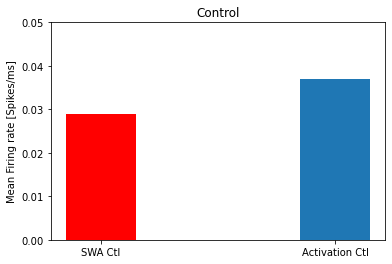

In [33]:
# Plot Mean firing rates during SWA and cortical beta oscillations in control animals
group = ['SWA Ctl','SWA Park','Activation Ctl','Activation Park']
plt.bar(group[0],mean_IFR_SWA_Ctl, align='center', width = 0.3, color = 'red')
plt.bar(group[2],mean_IFR_activ_ctl, align='center', width = 0.3)
plt.ylabel('Mean Firing rate [Spikes/ms]')
plt.title('Control')
plt.ylim(0, 0.05)

(0.0, 0.05)

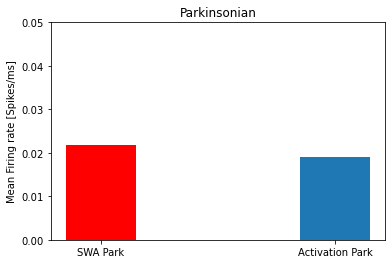

In [34]:
# plot Mean firing rates during SWA and cortical beta oscillations in parkinsonian animals
plt.bar(group[1],mean_IFR_SWA_park, align='center', width = 0.3, color = 'red')
plt.bar(group[3],mean_IFR_activ_park, align='center',width = 0.3)
plt.ylabel('Mean Firing rate [Spikes/ms]')
plt.title('Parkinsonian')
plt.ylim(0, 0.05)